In [2]:
import os
import numpy as np
import pandas as pd
import librosa
import soundfile as sf

from matplotlib import pyplot as plt

from model import TransformerModel

In [3]:
def process_audio_data(audio_path):
    # Load audio data
    audio, _ = librosa.load(audio_path, sr=None)
    
    # Compute the STFT
    stft = librosa.core.stft(audio, n_fft=2048, window='hann', hop_length=1024)
    
    # Compute the magnitude spectrogram
    stft_abs = np.abs(stft)
    
    # Convert the magnitude spectrogram to dB scale
    spec_db = librosa.amplitude_to_db(stft_abs, ref=np.max)
    
    return spec_db

In [4]:
def display_spectrogram(spec_db, sample_rate=44100, hop_length=1024):
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(spec_db, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='linear', cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.show()

In [5]:
normal_folder_path = 'data/normal'
normal_spec_list = []

for file_name in os.listdir(normal_folder_path):
    if file_name.endswith(".wav"):
        file_path = os.path.join(normal_folder_path, file_name)
        spec_db = process_audio_data(file_path)
        normal_spec_list.append(spec_db)

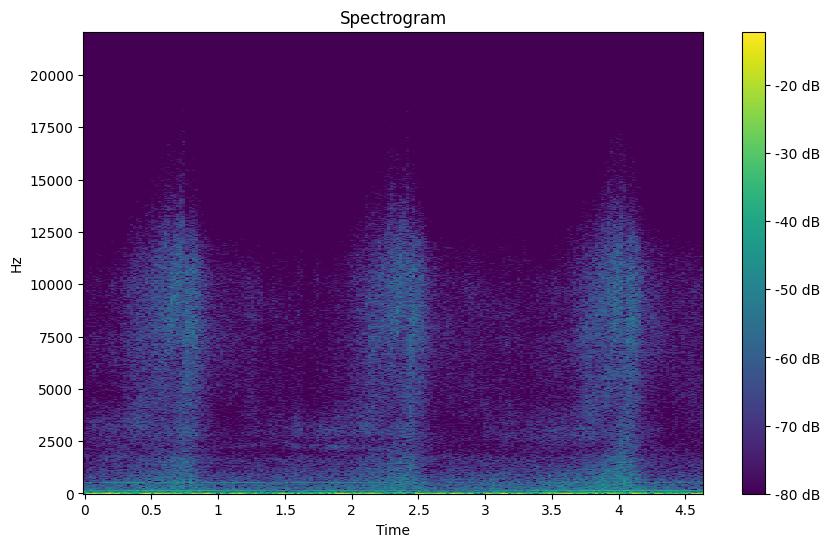

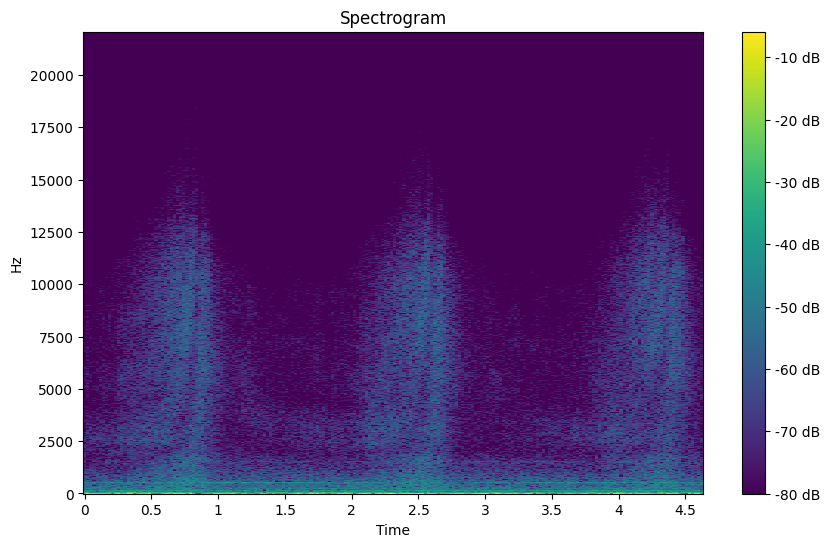

In [12]:
for i in range(2):
    display_spectrogram(normal_spec_list[i][:, :200])

In [7]:
whistle_folder_path = 'data/whistle'
whistle_spec_list = []

for file_name in os.listdir(whistle_folder_path):
    if file_name.endswith(".wav"):
        file_path = os.path.join(whistle_folder_path, file_name)
        spec_db = process_audio_data(file_path)
        whistle_spec_list.append(spec_db)

(1025, 200)


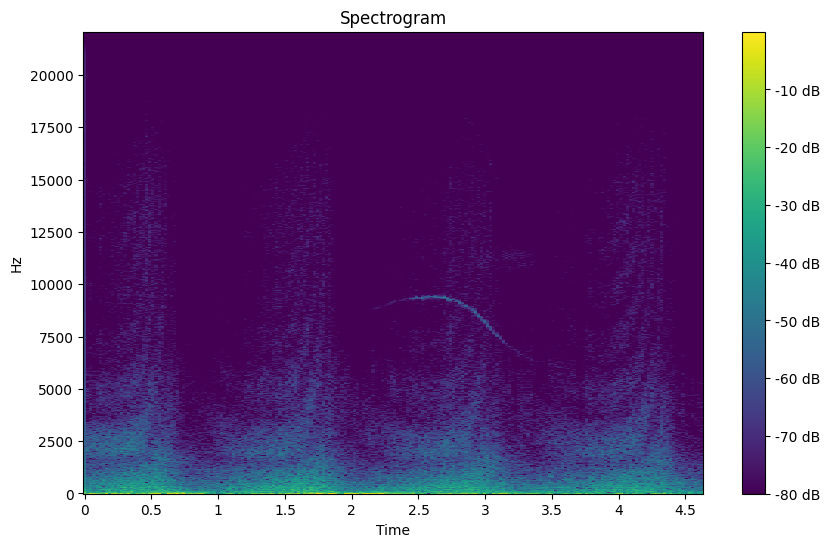

(1025, 200)


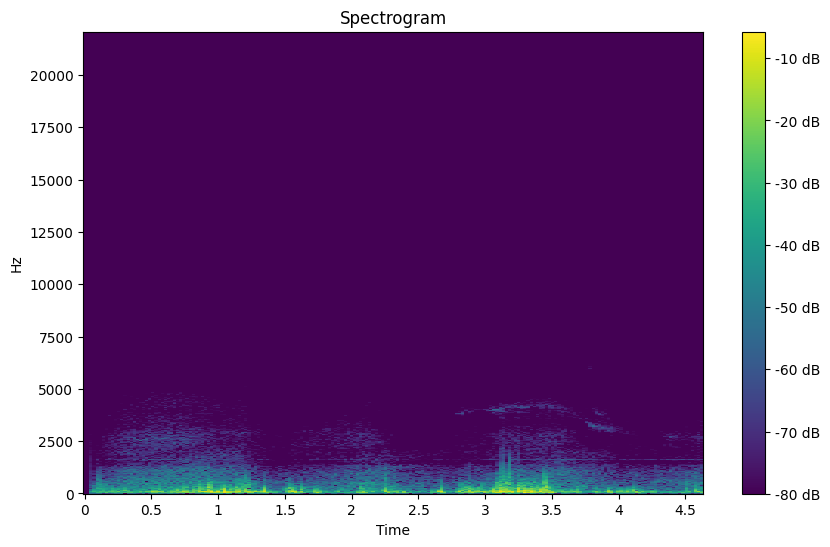

In [10]:
for i in range(2):
    print(whistle_spec_list[i][:, :200].shape)
    display_spectrogram(whistle_spec_list[i][:, :100])

In [9]:
model = TransformerModel()

TypeError: TransformerModel.__init__() missing 5 required positional arguments: 'n_features', 'n_classes', 'd_model', 'n_heads', and 'n_encoder_layers'